In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [2]:
def percent_scaling(series):
    return (series / 100)

def cpu_scaling(series):
    return (series * 4 / 100)

def single_cpu_scaling(series):
    return (((series - 100) * (-1)) / 100)

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [3]:
cpu_df = pd.read_csv('../results/matrix-numa.csv')

cpu_df['cache_hit_rate_0'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_0']) / cpu_df['cache_hit_0']
cpu_df['cache_hit_rate_1'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_1']) / cpu_df['cache_hit_1']
cpu_df['cache_hit_rate_2'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_2']) / cpu_df['cache_hit_2']
cpu_df['cache_hit_rate_3'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_3']) / cpu_df['cache_hit_3']
cpu_df['cache_hit_rate_avg'] = (cpu_df['cache_hit_rate_0'] + cpu_df['cache_hit_rate_1'] + cpu_df['cache_hit_rate_2'] + cpu_df['cache_hit_rate_3']) / 4

cpu_df['br_miss_rate_0'] = cpu_df['br_miss_0'] / cpu_df['br_insns_0']
cpu_df['br_miss_rate_1'] = cpu_df['br_miss_1'] / cpu_df['br_insns_1']
cpu_df['br_miss_rate_2'] = cpu_df['br_miss_2'] / cpu_df['br_insns_2']
cpu_df['br_miss_rate_3'] = cpu_df['br_miss_3'] / cpu_df['br_insns_3']
cpu_df['br_miss_rate_avg'] = (cpu_df['br_miss_rate_0'] + cpu_df['br_miss_rate_1'] + cpu_df['br_miss_rate_2'] + cpu_df['br_miss_rate_3']) / 4

cpu_df['clock_speed'] = (cpu_df['insns_0'] + cpu_df['insns_1'] + cpu_df['insns_2'] + cpu_df['insns_3']) / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df = cpu_df.drop(index=0)

cpu_df

,time,current,cpu_cycles_0,insns_0,cache_hit_0,cache_miss_0,br_insns_0,br_miss_0,bus_cycles_0,freq_0,...,cache_hit_rate_1,cache_hit_rate_2,cache_hit_rate_3,cache_hit_rate_avg,br_miss_rate_0,br_miss_rate_1,br_miss_rate_2,br_miss_rate_3,br_miss_rate_avg,clock_speed
1,2691,1.944,41410,17962,6689,49,1839,269,12316,1000000,...,2.108613,2.104964,0.095378,1.325407,0.146275,0.145540,0.145161,0.071332,0.127077,110.913761
2,4241,1.944,34196,15660,5781,47,1506,217,8640,1000000,...,1.799438,1.798876,0.082494,1.168169,0.144090,0.142410,0.136150,0.066108,0.122190,114.068387
3,5791,1.944,34102,15662,5788,47,1504,215,8694,1000000,...,1.801062,1.799813,0.081686,1.168610,0.142952,0.133020,0.133020,0.065680,0.118668,115.636129
4,7334,1.944,34136,15662,5786,43,1506,212,8704,1000000,...,1.801000,1.799188,0.082869,1.168906,0.140770,0.133020,0.134585,0.063811,0.118047,115.077771
5,8921,1.696,39433,18766,6861,46,1889,266,11450,1000000,...,2.136832,2.136207,0.102554,1.342222,0.140815,0.140845,0.133020,0.064334,0.119754,113.204789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44534,85867080,2.124,385838,281251,104991,1052,71448,1853,188760,1000000,...,29.795629,29.836839,29.744970,22.591855,0.025935,0.131054,0.128940,0.126062,0.102998,201.801418
44535,85868638,1.864,383606,280188,104460,1042,71309,1760,187630,1000000,...,29.653322,29.693204,29.586119,22.480668,0.024681,0.128205,0.128940,0.126062,0.101972,200.195764
44536,85870213,1.864,384577,281824,104941,1030,72172,1799,188162,1000000,...,29.798069,29.821489,29.797785,22.601882,0.024927,0.129630,0.128940,0.128205,0.102925,199.099048
44537,85871770,1.864,380460,278786,103895,997,71127,1737,186062,1000000,...,29.501278,29.516624,29.484530,22.373209,0.024421,0.128205,0.130372,0.129630,0.103157,199.432241


In [4]:
cpu_df.drop('time', axis=1).corr()['current']

current               1.000000
cpu_cycles_0          0.379546
insns_0               0.362891
cache_hit_0           0.350475
cache_miss_0          0.397269
br_insns_0            0.207099
br_miss_0             0.084071
bus_cycles_0          0.379859
freq_0                0.131316
cpu_cycles_1          0.477603
insns_1               0.474445
cache_hit_1           0.469217
cache_miss_1          0.527512
br_insns_1            0.320919
br_miss_1             0.165341
bus_cycles_1          0.478266
freq_1                0.131316
cpu_cycles_2          0.360475
insns_2               0.354235
cache_hit_2           0.349350
cache_miss_2          0.386839
br_insns_2            0.254643
br_miss_2             0.135926
bus_cycles_2          0.361188
freq_2                0.131316
cpu_cycles_3          0.257701
insns_3               0.266003
cache_hit_3           0.279737
cache_miss_3          0.229825
br_insns_3            0.255929
br_miss_3             0.262884
bus_cycles_3          0.259226
freq_3  

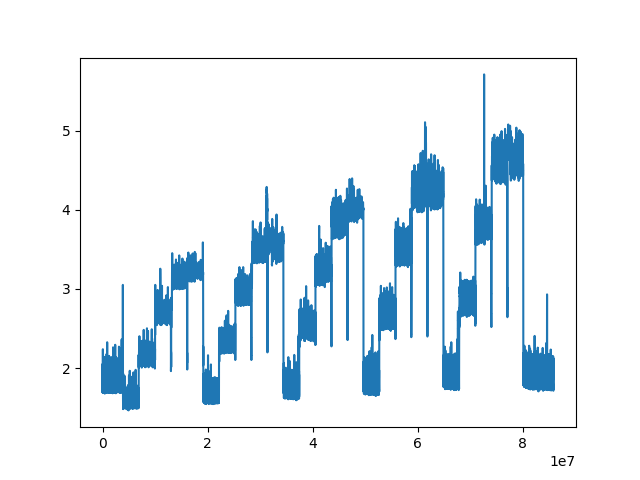

In [5]:
%matplotlib ipympl
plt.plot(cpu_df["time"].values.reshape(-1, 1),
         cpu_df['current'].values.reshape(-1, 1))

In [6]:
num_cpus = [0, 1, 2, 3, 4]
freq_types = [600000, 700000, 800000, 900000, 1000000]

timings = { 600000: {0: [3860000, 6860000],
                     1: [7040000, 10020000],
                     2: [10120000, 12900000],
                     3: [13400000, 15780000],
                     4: [16380000, 19050000]},
            700000: {0: [19260000, 22140000],
                     1: [22340000, 25220000],
                     2: [25420000, 28200000],
                     3: [28600000, 31080000],
                     4: [31670000, 34360000]},
            800000: {0: [34560000, 37340000],
                     1: [37630000, 40520000],
                     2: [40710000, 43500000],
                     3: [43790000, 46570000],
                     4: [46870000, 49650000]},
            900000: {0: [49750000, 52630000],
                     1: [52830000, 55710000],
                     2: [55910000, 58790000],
                     3: [59090000, 61470000],
                     4: [62170000, 64750000]},
           1000000: {0: [65150000, 67530000],
                     1: [68230000, 71010000],
                     2: [71210000, 74090000],
                     3: [74390000, 76970000],
                     4: [77370000, 80050000]}}

currents = timings

for cpus in num_cpus:
    for freq in freq_types:
        temp_df = cpu_df.loc[(cpu_df['freq_0'] == freq) & (cpu_df['time'] > timings[freq][cpus][0]) & (cpu_df['time'] < timings[freq][cpus][1])]
        currents[freq][cpus] = temp_df['current'].mean()

currents

{600000: {0: 1.639775927327782,
  1: 2.182110091743119,
  2: 2.7117306733167084,
  3: 3.1487044776119406,
  4: 3.2207080745341616},
 700000: {0: 1.7275771905424202,
  1: 2.3588663400979706,
  2: 2.9747566765578637,
  3: 3.4979268085106385,
  4: 3.5351324828263007},
 800000: {0: 1.7933495605138605,
  1: 2.533650955414013,
  2: 3.2598788694481833,
  3: 3.8717855670103094,
  4: 4.0034206257242175},
 900000: {0: 1.8470023419203747,
  1: 2.6739751626256654,
  2: 3.5148920863309354,
  3: 4.247435399551905,
  4: 4.239304589707928},
 1000000: {0: 1.9165710491367864,
  1: 2.8508722669735334,
  2: 3.7853708497467644,
  3: 4.589262750161394,
  4: 4.628316806181584}}